In [2]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [4]:
! pip install kaggle

In [5]:
kaggle_credentails = json.load(open("kaggle.json"))


In [6]:
# Setup kaggle api key as enviromnet variable

os.environ['KAGGLE_USERNAME']= kaggle_credentails["username"]

os.environ['KAGGLE_KEY']= kaggle_credentails["key"]

In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


100% 2.04G/2.04G [01:44<00:00, 22.5MB/s]
100% 2.04G/2.04G [01:44<00:00, 20.9MB/s]


In [8]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [9]:

# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [10]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Pepper,_bell___healthy', 'Tomato___Target_Spot', 'Tomato___healthy', 'Raspberry___healthy', 'Potato___Early_blight']
38
['Pepper,_bell___healthy', 'Tomato___Target_Spot', 'Tomato___healthy', 'Raspberry___healthy', 'Potato___Early_blight']
38
['Pepper,_bell___healthy', 'Tomato___Target_Spot', 'Tomato___healthy', 'Raspberry___healthy', 'Potato___Early_blight']


## No of classes 38

In [11]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])


423
['0f8906e9-86e1-49f8-aea0-3e887924799d___Mt.N.V_HL 9012.JPG', '8c3b791e-e2e5-4f3b-8183-610458658926___Mt.N.V_HL 8982.JPG', '103b436c-40f5-40e7-b292-ae1bc619e194___Mt.N.V_HL 6084.JPG', '9c9ae952-4031-4fb0-9f79-fc9272a7a1fa___Mt.N.V_HL 6141.JPG', 'd36e68e3-09bf-4249-96cc-d806c55bfeed___Mt.N.V_HL 9048.JPG']


In [12]:
# Dataset Path
base_dir = 'plantvillage dataset/color'


(256, 256, 3)


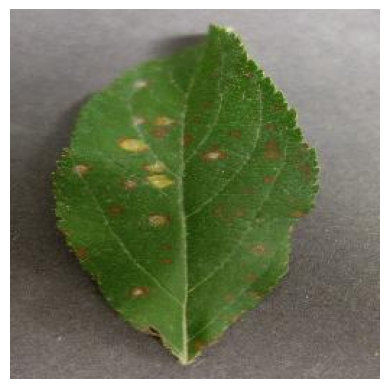

In [13]:

image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/052e3deb-0499-4685-bc39-cea7f1df0700___FREC_C.Rust 3742.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [14]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/052e3deb-0499-4685-bc39-cea7f1df0700___FREC_C.Rust 3742.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[155 151 150]
  [154 150 149]
  [154 150 149]
  ...
  [185 181 182]
  [187 183 184]
  [188 184 185]]

 [[151 147 146]
  [150 146 145]
  [150 146 145]
  ...
  [181 177 178]
  [181 177 178]
  [181 177 178]]

 [[149 145 144]
  [148 144 143]
  [148 144 143]
  ...
  [180 176 177]
  [179 175 176]
  [179 175 176]]

 ...

 [[119 109 107]
  [125 115 113]
  [130 120 118]
  ...
  [118 109 104]
  [120 111 106]
  [122 113 108]]

 [[112 102 100]
  [109  99  97]
  [107  97  95]
  ...
  [131 122 117]
  [136 127 122]
  [141 132 127]]

 [[113 103 101]
  [118 108 106]
  [121 111 109]
  ...
  [123 114 109]
  [127 118 113]
  [131 122 117]]]


In [15]:

# Image Parameters
img_size = 224
batch_size = 32

## Train, Test, split

In [16]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [17]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [18]:

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [20]:

# Model Definition

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (img_size,img_size,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


In [21]:

# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 27, 27, 128)      

In [22]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:

# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 [==============================] - 112s 82ms/step - loss: 2.1520 - accuracy: 0.4051 - val_loss: 1.0953 - val_accuracy: 0.6609
Epoch 2/5
1358/1358 [==============================] - 112s 83ms/step - loss: 0.9374 - accuracy: 0.7172 - val_loss: 0.6056 - val_accuracy: 0.8095
Epoch 3/5
1358/1358 [==============================] - 108s 79ms/step - loss: 0.5887 - accuracy: 0.8189 - val_loss: 0.4831 - val_accuracy: 0.8464
Epoch 4/5
1358/1358 [==============================] - 111s 81ms/step - loss: 0.4423 - accuracy: 0.8619 - val_loss: 0.3290 - val_accuracy: 0.8927
Epoch 5/5
1358/1358 [==============================] - 109s 80ms/step - loss: 0.3622 - accuracy: 0.8861 - val_loss: 0.3073 - val_accuracy: 0.9001


In [25]:

# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
339/339 [==============================] - 21s 62ms/step - loss: 0.3073 - accuracy: 0.9001
Validation Accuracy: 90.01%


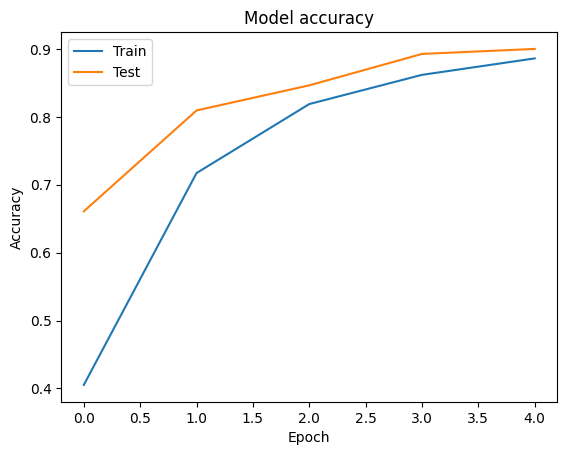

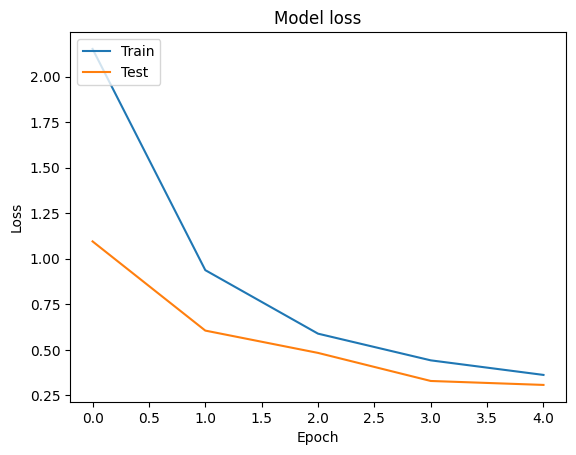

In [26]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [28]:

# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [31]:

class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [32]:

# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [44]:

# Example Usage
#image_path = '/content/plantvillage dataset/color/Tomato___Early_blight/00e7c4b2-3005-4558-9cfa-235e356cb7a8___RS_Erly.B 7844.JPG'
image_path = '/content/plantvillage dataset/color/Tomato___Tomato_mosaic_virus/00c07a77-15e6-4815-92d4-8d1e1afb7f3c___PSU_CG 2052.JPG'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 26ms/step
Predicted Class Name: Tomato___Spider_mites Two-spotted_spider_mite


In [41]:
model.save('drive/MyDrive/Plant/plant_disease_prediction_model.h5')

In [42]:

model.save('plant_disease_prediction_model.h5')